# Antarctic Daily Sea Ice Extent 

In this notebook, we download and plot the daily Antarctic sea ice extent from NSIDC (downloaded 12 May 2021).

Source: https://nsidc.org/data/G02135/versions/3

#### Import packages

In [1]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import xarray as xr
import pandas as pd
import os

#### Select individual years to plot

In [2]:
years_to_plot = [2013, 2016, 2020, 2021]
colors_for_lines = ["black", "red", "green", "orange"]

### Load data

#### If needed, download new copy of daily Antarctic sea ice files from NSIDC

In [3]:
# uncomment the lines below to download fresh copies (daily values will be updated)
#os.system('curl -O ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/south/daily/data/S_seaice_extent_climatology_1981-2010_v3.0.csv');
#os.system('curl -O ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/south/daily/data/S_seaice_extent_daily_v3.0.csv');
#os.system('curl -O ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/south/daily/data/S_seaice_extent_daily_v3.0.csv.bak');

#### Read CSV formatted data using pandas

In [4]:
climatology = pd.read_csv('S_seaice_extent_climatology_1981-2010_v3.0.csv', skiprows=1)
daily = pd.read_csv('S_seaice_extent_daily_v3.0.csv', skiprows=[1])
daily_bak = pd.read_csv('S_seaice_extent_daily_v3.0.csv.bak', skiprows=[1])

# remove whitespace from column names
climatology.columns = climatology.columns.str.replace(' ', '')
daily.columns = daily.columns.str.replace(' ', '')
daily_bak.columns = daily_bak.columns.str.replace(' ', '')

#### Examine the contents of the "climatology" dataframe

In [5]:
climatology

,DOY,AverageExtent,StdDeviation,10th,25th,50th,75th,90th
0,1,6.999,0.635,6.278,6.656,6.908,7.374,7.721
1,2,6.808,0.649,6.053,6.458,6.667,7.161,7.623
2,3,6.621,0.646,5.846,6.278,6.501,6.864,7.501
3,4,6.451,0.655,5.698,6.061,6.316,6.689,7.353
4,5,6.296,0.680,5.525,5.947,6.166,6.541,7.245
...,...,...,...,...,...,...,...,...
361,362,7.811,0.672,7.078,7.345,7.738,8.052,8.448
362,363,7.624,0.664,6.821,7.242,7.592,7.879,8.313
363,364,7.406,0.636,6.678,7.030,7.350,7.680,8.051
364,365,7.222,0.609,6.541,6.838,7.144,7.488,7.854


#### Examine the contents of the "daily" dataframe

In [6]:
daily

,Year,Month,Day,Extent,Missing,SourceData
0,1978,10,26,17.624,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...
1,1978,10,28,17.803,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...
2,1978,10,30,17.670,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...
3,1978,11,1,17.527,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...
4,1978,11,3,17.486,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.03/nt_19...
...,...,...,...,...,...,...
13881,2021,5,7,9.490,0.000,['/ecs/DP1/PM/NSIDC-0081.001/2021.05.06/nt_202...
13882,2021,5,8,9.595,0.000,['/ecs/DP1/PM/NSIDC-0081.001/2021.05.07/nt_202...
13883,2021,5,9,9.720,0.000,['/ecs/DP1/PM/NSIDC-0081.001/2021.05.08/nt_202...
13884,2021,5,10,9.859,0.001,['/ecs/DP1/PM/NSIDC-0081.001/2021.05.09/nt_202...


#### Calculate day of year, add column to "daily" dataframe

In [7]:
# this creates the DataFrame that can be used to calculate day of year
df_date = pd.DataFrame({'year': daily.Year.values,
                        'month': daily.Month.values,
                        'day': daily.Day.values})

# the .dt.dayofyear function calculates day of year
DOY = pd.to_datetime(df_date).dt.dayofyear

# insert day of year (DOY) as a new column 
daily.insert(0,"DOY",DOY)

### Create plots

#### Simple climatology plot

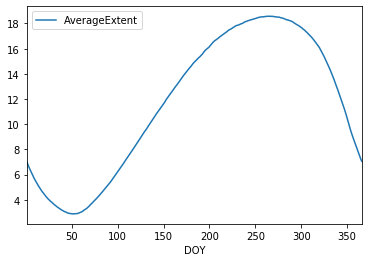

In [8]:
climatology.plot(x='DOY',y='AverageExtent')

#### Keys for reference

In [9]:
climatology.keys()

Index(['DOY', 'AverageExtent', 'StdDeviation', '10th', '25th', '50th', '75th',
       '90th'],
      dtype='object')

In [10]:
daily.keys()

Index(['DOY', 'Year', 'Month', 'Day', 'Extent', 'Missing', 'SourceData'], dtype='object')

#### Summary statistics for sea ice extent

In [11]:
# to see the full description, remove the call to .tail()
daily[["Year","Extent"]].groupby("Year").describe().tail()

Extent                                                             
      count       mean       std    min     25%      50%     75%     max
Year                                                                    
2017  365.0  10.748926  5.857293  2.080  4.7810  11.5950  16.841  18.145
2018  365.0  10.999970  5.745034  2.200  5.4290  11.8810  16.815  18.315
2019  365.0  10.876060  5.810582  2.427  4.8760  11.4700  16.709  18.489
2020  366.0  11.534533  5.762537  2.656  5.6765  12.4825  17.104  18.983
2021  129.0   5.203860  2.048079  2.604  3.4730   4.8530   6.449   9.936

#### Example plot: sea ice extent in the year 2018 

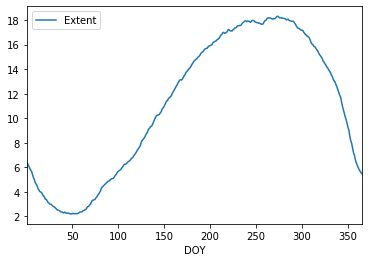

In [12]:
daily[daily.Year==2018].plot(x='DOY',y='Extent')

## Main figure: comparing climatology with individual years

In [13]:
# helper function to add arrows and text
def annotate_years(years_to_plot, colors_for_lines, ax=None):
    delta = 0
    i = -1
    for year in years_to_plot:
        delta = delta + 20 
        i = i + 1
        nowData=daily[daily.Year==int(year)]
        nowExtent=nowData['Extent'].values
        xy_x = min(50+delta,nowExtent.size)-1
        xy_y = nowExtent[xy_x]
        nowColor = str(colors_for_lines[i])
        ax.annotate(year,
                    (xy_x,xy_y),
                    (xy_x-50,xy_y+2),
                    arrowprops=dict(facecolor=nowColor, shrink=0.05),
                    fontsize='xx-large',
                    color=nowColor)
    return(ax)

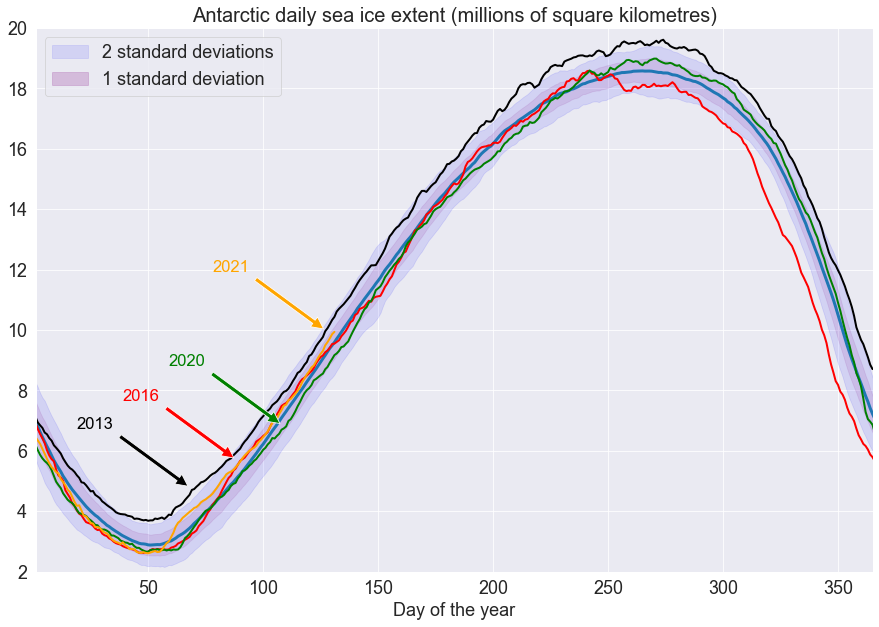

In [16]:
# two standard deviations
x = climatology.DOY
y1 = climatology.AverageExtent - 2.0*climatology.StdDeviation
y2 = climatology.AverageExtent + 2.0*climatology.StdDeviation

# one standard deviation
x = climatology.DOY
y3 = climatology.AverageExtent - climatology.StdDeviation
y4 = climatology.AverageExtent + climatology.StdDeviation

# plot data
fig, ax = plt.subplots(figsize=(15,10))
sns.set_context("paper")
ax.fill_between(x, y1, y2, color='blue', alpha=.1)
ax.fill_between(x, y3, y4, color='purple', alpha=.1)

# plot line for climatology
sns.lineplot(data=climatology, 
             x='DOY', 
             y='AverageExtent', 
             linewidth=3.0, 
             ax=ax)

# plot individual lines for individual years
year_count = -1
for nyear in years_to_plot:
    year_count = year_count + 1
    sns.lineplot(data=daily[daily.Year==nyear],
                 x='DOY',
                 y='Extent',
                 color=colors_for_lines[year_count],
                 linewidth=2.0,
                 ax=ax)
    
# manual legend
purple_patch = mpatches.Patch(color='purple', label='1 standard deviation', alpha=.2)
blue_patch = mpatches.Patch(color='blue', label='2 standard deviations', alpha=.1)
plt.legend(handles=[blue_patch,purple_patch], fontsize=18)

# tick label font size
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

# title, xlabel, and ylabel
plt.title("Antarctic daily sea ice extent (millions of square kilometres)", fontsize=20)
plt.xlabel("Day of the year", fontsize=18)
plt.ylabel("")

# limits of x and y axes
plt.xlim([1,365])
plt.ylim([2.0, 20.0])

# call helper function to annotate years
annotate_years(years_to_plot, colors_for_lines, ax=ax)

# customize (white, dark, whitegrid, darkgrid, ticks)
sns.set_style("darkgrid")



#### Save figure as vector graphic (PDF)

In [17]:
# save figure
fig.savefig('antarctic_sea_ice_extent.pdf', format='pdf')

# it's helpful to run "pdfcrop" or a similar command line tool on this PDF afterwards, if available